<a href="https://colab.research.google.com/github/pinilDissanayaka/Multi-Vector-Retriever-for-RAG-on-Tables-Texts/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr -y
!sudo apt install libtesseract-dev -y
!sudo apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,910 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
!pip install langchain unstructured[all-docs] pydantic lxml openai chromadb tiktoken opencv-python pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [3]:
pip install langchain-google-vertexai --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 2.8.0
    Uninstalling google-cloud-storage-2.8.0:
      Successfully uninstalled google-cloud-storage-2.8.0


In [4]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [5]:
pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.5/245.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 8.5 MB/s eta 0:00:00


In [3]:
import os
import uuid
import requests
import base64
from PIL import Image
from unstructured.partition.pdf import partition_pdf
from langchain_core.documents import Document
from langchain_core.prompts.chat import ChatPromptTemplate
from langchain_groq.chat_models import ChatGroq
from langchain_google_vertexai import ChatVertexAI
from langchain.embeddings import VertexAIEmbeddings
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.schema.document import Document
from langchain_experimental.text_splitter import SemanticChunker
from langchain.text_splitter import RecursiveCharacterTextSplitter
from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.messages import HumanMessage
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from google.colab import userdata

In [4]:
os.environ['GROQ_API_KEY']=userdata.get('GROQ_API_KEY')
os.environ["GOOGLE_API_KEY"]=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_PROJECT_ID"]=userdata.get('GOOGLE_PROJECT_ID')
os.environ["PINECONE_API_KEY"]=userdata.get('PINECORN_API_KEY')

In [5]:
file_path="/content/llama3.pdf"

with open(file_path, "wb") as file:
  response = requests.get("https://arxiv.org/pdf/2302.13971")
  file.write(response.content)

In [6]:
output_path = "./images"

In [7]:
raw_pdf_elements = partition_pdf(
    filename=file_path,
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    extract_image_block_output_dir=output_path,
)

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
for element in raw_pdf_elements:
  print(type(element))

<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.Table'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.Table'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.Table'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.Table'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.Table'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.Table'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.Table'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstruc

In [9]:
llm=ChatGroq(model="llama3-groq-70b-8192-tool-use-preview", temperature=0.2)

In [10]:
summary_prompt_template='''Summarize the key insights from the table.
Focus on highlighting major trends, patterns, or significant values.
Include comparisons where applicable and note any outliers or anomalies.
Provide a clear and concise summary that captures the essence of the {table_data}.'''


summary_prompt=ChatPromptTemplate.from_template(summary_prompt_template)

print(f"Summary prompt {summary_prompt}")

summary_chain=summary_prompt | llm | StrOutputParser()

Summary prompt input_variables=['table_data'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['table_data'], template='Summarize the key insights from the table.\nFocus on highlighting major trends, patterns, or significant values.\nInclude comparisons where applicable and note any outliers or anomalies.\nProvide a clear and concise summary that captures the essence of the {table_data}.'))]


In [ ]:
table_count=0
table_elements=list()
table_summary=list()

text_count=0
text=list()

for element in raw_pdf_elements:
  if str(type(element))=="<class 'unstructured.documents.elements.Table'>":
    table_count+=1
    table_elements.append(element.text)
    table_summary.append(Document(
        page_content=summary_chain.invoke({"table_data" :element.text }),
        metadata={
            "id":str(uuid.uuid4()),
            "type":"table"
        }
        )
    )
  else:
    text_count+=1
    text.append(Document(
        page_content=element.text,
        metadata={
            "id":str(uuid.uuid4()),
            "type":"text"
        }
        )
    )

In [ ]:
print(f"Text element count = {text_count}")
print(f"Table element count = {table_count}")

Text element count = 42
Table element count = 16


In [ ]:
import vertexai

vertexai.init(project=os.environ["GOOGLE_PROJECT_ID"])

In [ ]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=IVZ12ornCFnmhLPmPmNYkBzI7rW9c6&prompt=consent&token_usage=remote&access_type=offline&code_challenge=TL9s2kUdDnkAkGHbivIv57oyOgjhtGELfbZC0rVEifk&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AQlEd8xdNFw6corkMRUds5VRIl2KHoJOwYeMjbyOQ0eEqVgJDC52ihxGVeGd4xHO8kBKEw

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Q

In [ ]:
gemini= ChatVertexAI(
    model="gemini-1.5-pro",
    temperature=0.2,
    max_tokens=None,
    max_retries=6,
    stop=None,
)

In [ ]:
def summarizePrompt(image_data):
  image_message = {
      "type": "image_url",
      "image_url": {
          "url": f"data:image/jpeg;base64,{base64.b64encode(image_data).decode('utf-8')}"
      },
  }
  text_message = {
      "type": "text",
      "text": "What is shown in this image?",
  }

  message = HumanMessage(content=[text_message, image_message])
  return [message]

In [ ]:
image_summary_chain=RunnableLambda(summarizePrompt) | gemini | StrOutputParser()

In [ ]:
image_count=0
image_elements=list()
image_summary=[]


for image in os.listdir(output_path):
  image_path=os.path.join(output_path, image)
  with open(image_path, "rb") as img:
    image_data=img.read()
    base64_encoded_data=base64.b64encode(image_data).decode('utf-8')
  img=Image.open(image_path)
  image_count+=1
  image_elements.append(base64_encoded_data)
  image_summary.append(
      Document(
          page_content=image_summary_chain.invoke(image_data),
          metadata={
              "id":str(uuid.uuid4()),
              "type":"image",
              "image_path":image_path
              }
          )
      )

In [ ]:
image_summary[0]

Document(metadata={'id': '65422108-1e61-45f1-a39c-ec67e6c7a9a5', 'type': 'image', 'image_path': './images/figure-3-1.jpg'}, page_content="The image shows a graph of the training loss of four different LLaMA (Large Language Model Meta AI) models over billions of tokens seen during training. \n\nHere's a breakdown:\n\n* **X-axis:** Billion of tokens - This represents the amount of text data the models have been trained on.\n* **Y-axis:** Training loss - This is a measure of how well the model is predicting the next token in a sequence. Lower loss indicates better performance.\n* **Lines:** Each line represents a different LLaMA model, with the size of the model (in billions of parameters) indicated in the legend.\n\n**Observations:**\n\n* All models show a general trend of decreasing loss as they are trained on more data. This is expected, as more data allows the models to learn more complex patterns in language.\n* Larger models generally achieve lower loss than smaller models. This sug

In [ ]:
documents=[]
for i in text:
  documents.append(i)
for i in table_summary:
  documents.append(i)
for i in image_summary:
  documents.append(i)

In [ ]:
dimension=768
embeddings=GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

In [ ]:
document_chunks=RecursiveCharacterTextSplitter(chunk_size=1200,
                                               chunk_overlap=600,
                                               length_function=len,
                                               is_separator_regex=False).split_documents(documents=documents)

In [ ]:
pinecone=Pinecone()

print(f"List of all indexes in pinecone : {pinecone.list_indexes().names()}")

List of all indexes in pinecone : ['randika']


In [ ]:
def createIndex(indexName:str, dimension:int):
  try:
    pinecone=Pinecone()
    if indexName not in pinecone.list_indexes().names():
      pinecone.create_index(
          name=indexName,
          dimension=dimension,
          metric="cosine",
          spec=ServerlessSpec(cloud='aws',
                            region='us-east-1')
      )
      print(f"Created {indexName}")
    else:
      print(f"{indexName} already exists")
    return pinecone.describe_index(indexName)
  except Exception as e:
    print(f"Error creating index: {e}")

In [ ]:
createIndex("llama3", dimension)

Created llama3


{
    "name": "llama3",
    "dimension": 768,
    "metric": "cosine",
    "host": "llama3-4myrn7y.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "deletion_protection": "disabled"
}

In [ ]:
pinecone_vector_store=PineconeVectorStore.from_documents(documents=document_chunks, embedding=embeddings, index_name="llama3")

In [ ]:
retriever=pinecone_vector_store.as_retriever()

In [ ]:
prompt_template = """Given the following context and a question, generate an answer based on this context only.which can include text, images and tables.
In the answer try to provide as much text as possible from "response" section in the source document context without making much changes.
If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer.

CONTEXT: {context}

QUESTION: {question}

response : """

prompt=ChatPromptTemplate.from_template(prompt_template)

print(f"Prompt : {prompt}")

Prompt : input_variables=['context', 'question'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template='Given the following context and a question, generate an answer based on this context only.which can include text, images and tables.\nIn the answer try to provide as much text as possible from "response" section in the source document context without making much changes.\nIf the answer is not found in the context, kindly state "I don\'t know." Don\'t try to make up an answer.\n\nCONTEXT: {context}\n\nQUESTION: {question}\n\nresponse : '))]


In [ ]:
from IPython.display import display, Markdown

def display_images(images, summaries):
  for image, summary in zip(images, summaries):
    display(Image.open(image))
    display(Markdown(f"**{summary}**"))


def answer_question(question:str):
  responses=pinecone_vector_store.similarity_search(question)

  context=""
  relavant_image_summary=[]
  relavant_image_paths=set()

  for response in responses:
    if response.metadata["type"]=="image":
      relavant_image_paths.add(response.metadata["image_path"])
      relavant_image_summary.append(response.page_content)

    context+=response.page_content

  response_chain=prompt | llm | StrOutputParser()

  response=response_chain.invoke({"context":context, "question":question})

  display_images(relavant_image_paths, relavant_image_summary)
  display(Markdown(f"**{response}**"))

  return response, relavant_image_paths, relavant_image_summary

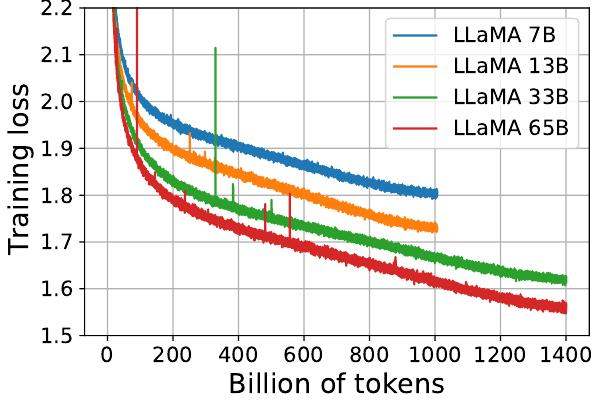

**The image shows a graph of the training loss of four different LLaMA (Large Language Model Meta AI) models over billions of tokens seen during training. 

Here's a breakdown:

* **X-axis:** Billion of tokens - This represents the amount of text data the models have been trained on.
* **Y-axis:** Training loss - This is a measure of how well the model is predicting the next token in a sequence. Lower loss indicates better performance.
* **Lines:** Each line represents a different LLaMA model, with the size of the model (in billions of parameters) indicated in the legend.

**Observations:**

* All models show a general trend of decreasing loss as they are trained on more data. This is expected, as more data allows the models to learn more complex patterns in language.
* Larger models generally achieve lower loss than smaller models. This suggests that larger models are capable of learning more nuanced representations of language.
* There are some fluctuations in the loss curves, particularly for the smaller models. This is normal and can be caused by factors such as the specific data being used for training.**

**The training losses of the model are shown in Figure 1, which illustrates the training loss over train tokens for the 7B, 13B, 33B, and 65 models. The graph shows a general trend of decreasing loss as the models are trained on more data, with larger models generally achieving lower loss than smaller models.**

In [ ]:
_, _, _=RunnableLambda(answer_question).invoke("training losses of the model?")